In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2021 - acc: 0.5874 - val_loss: 0.5957 - val_acc: 0.8152
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4964 - acc: 0.8487 - val_loss: 0.3496 - val_acc: 0.8970
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3549 - acc: 0.8910 - val_loss: 0.2812 - val_acc: 0.9146
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2951 - acc: 0.9081 - val_loss: 0.2609 - val_acc: 0.9194
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2591 - acc: 0.9189 - val_loss: 0.2595 - val_acc: 0.9193


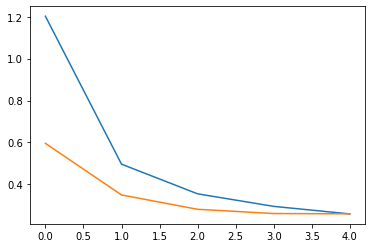

acc test:  0.9208
check same 0.15028739


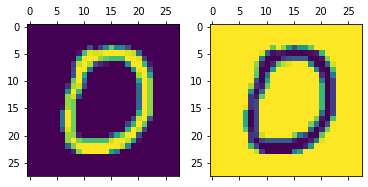

inverted colors acc test:  0.1179
Epoch 1/5
1500/1500 [==============================] - 9s 6ms/step - loss: 1.4274 - acc: 0.5439 - val_loss: 0.8631 - val_acc: 0.7592
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6916 - acc: 0.8119 - val_loss: 0.4931 - val_acc: 0.8736
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4620 - acc: 0.8737 - val_loss: 0.4483 - val_acc: 0.8611
Epoch 4/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3741 - acc: 0.8945 - val_loss: 0.3796 - val_acc: 0.8876
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3272 - acc: 0.9056 - val_loss: 0.2936 - val_acc: 0.9147


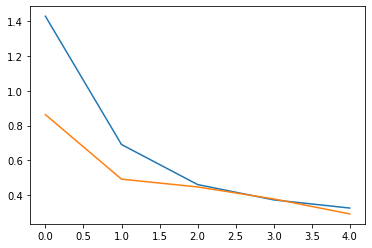

acc test:  0.914
check same 0.15028739


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


def features(input_shape):
    inp = layers.Input(input_shape)
    c1 = layers.Conv2D(32,(3,3),activation='relu',padding='same')(inp)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.Conv2D(64,(3,3),activation='relu',padding='same')(c1)
    c1 = layers.MaxPooling2D((2,2))(c1)
    c1 = layers.GlobalAveragePooling2D()(c1)
    feature_extract = models.Model(inp,c1)
    return feature_extract
    
def make_clf(input_shape):
    feats = layers.Input(input_shape)
    out1  = layers.Dense(64,activation='relu')(feats)
    out   = layers.Dense(10,activation='softmax')(out1)
    classifier = models.Model(feats,out)
    return classifier
    
    
def assemble_model(body, head):
    inp  = layers.Input(K.int_shape(body.input)[1:])
    feats= body(inp)
    clf  = head(feats)
    merged = models.Model(inp,clf)
    return merged
    
x_train = x_train/255
x_test = x_test/255

y_oh_train = tf.keras.utils.to_categorical(y_train)
y_oh_test  = tf.keras.utils.to_categorical(y_test)

body1 = features((28,28,1))
body2 = features((28,28,1))

head = make_clf((64))
m1 = assemble_model(body1, head)

m1.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
h = m1.fit(x_train, y_oh_train,validation_split=.2,epochs=5)
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()
y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('acc test: ',np.mean(y_pred_test==y_test))
print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))

fig,ax = plt.subplots(ncols=2)
ax[0].matshow(x_test[10])

# invert black and white
x_test = np.abs(x_test-1)
x_train = np.abs(x_train-1)

ax[1].matshow(x_test[10])
plt.show()

y_pred_test = np.argmax(m1.predict(x_test),axis=-1)
print('inverted colors acc test: ',np.mean(y_pred_test==y_test))



head.trainable = False
m2 = assemble_model(body2, head)
m2.compile('adam',loss='categorical_crossentropy',metrics=['acc'])
h = m2.fit(x_train, y_oh_train,validation_split=.2,epochs=5)
plt.figure()
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.show()
y_pred_test = np.argmax(m2.predict(x_test),axis=-1)
print('acc test: ',np.mean(y_pred_test==y_test))
print('check same',np.mean(np.abs(head.layers[1].get_weights()[0])))



